<a href="https://colab.research.google.com/github/dyi-el/optimized-traffic-light-computer-vision/blob/main/notebooks/yolov8-train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train YOLOv8 Object Detection Traffic Detection

---

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Apr 16 03:26:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
!pip install roboflow
from getpass import getpass

secret = getpass('Enter the API KEY: ')

from roboflow import Roboflow
rf = Roboflow(api_key=secret)
project = rf.workspace("dyiel").project("traffic-100")
version = project.version(2)
dataset = version.download("yolov8")


Enter the API KEY: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to traffic-100-2 in yolov8:: 100%|██████████| 492/492 [00:00<00:00, 3776.49it/s]


## Custom Training

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=150 lr0=0.001 imgsz=640 plots=True batch=8

/content
New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/traffic-100-2/data.yaml, epochs=150, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, aug

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/content


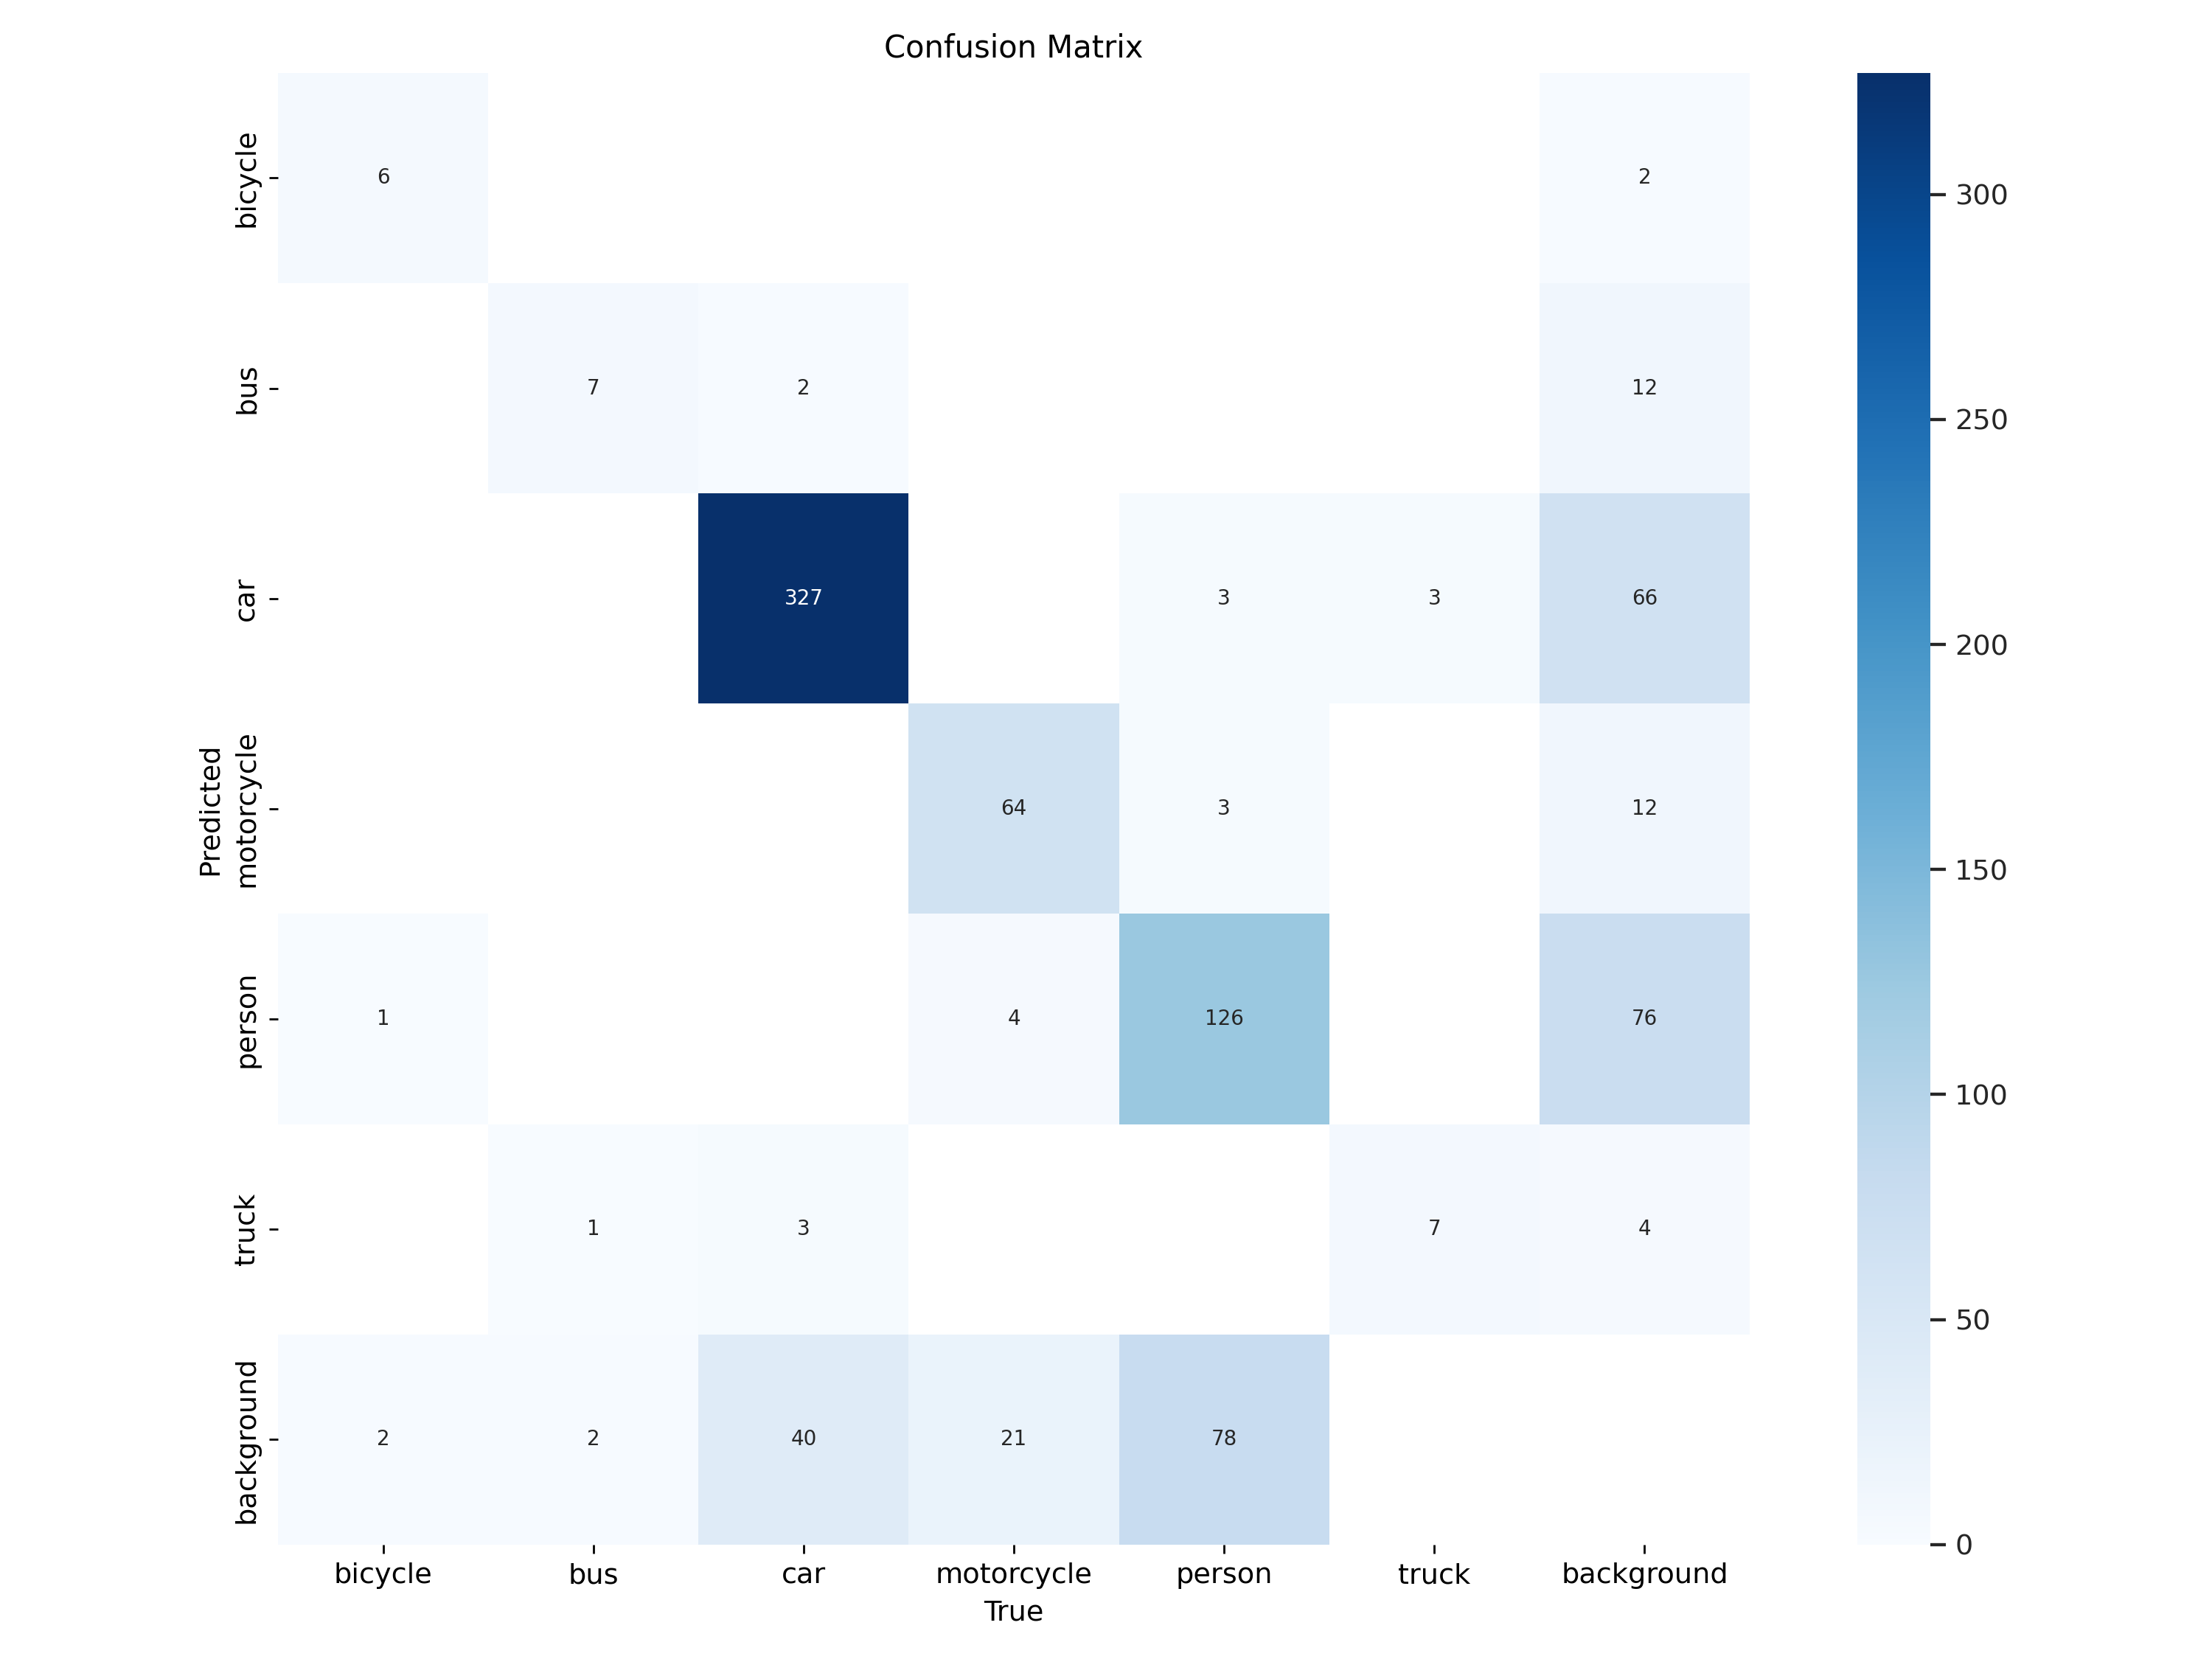

In [13]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/content


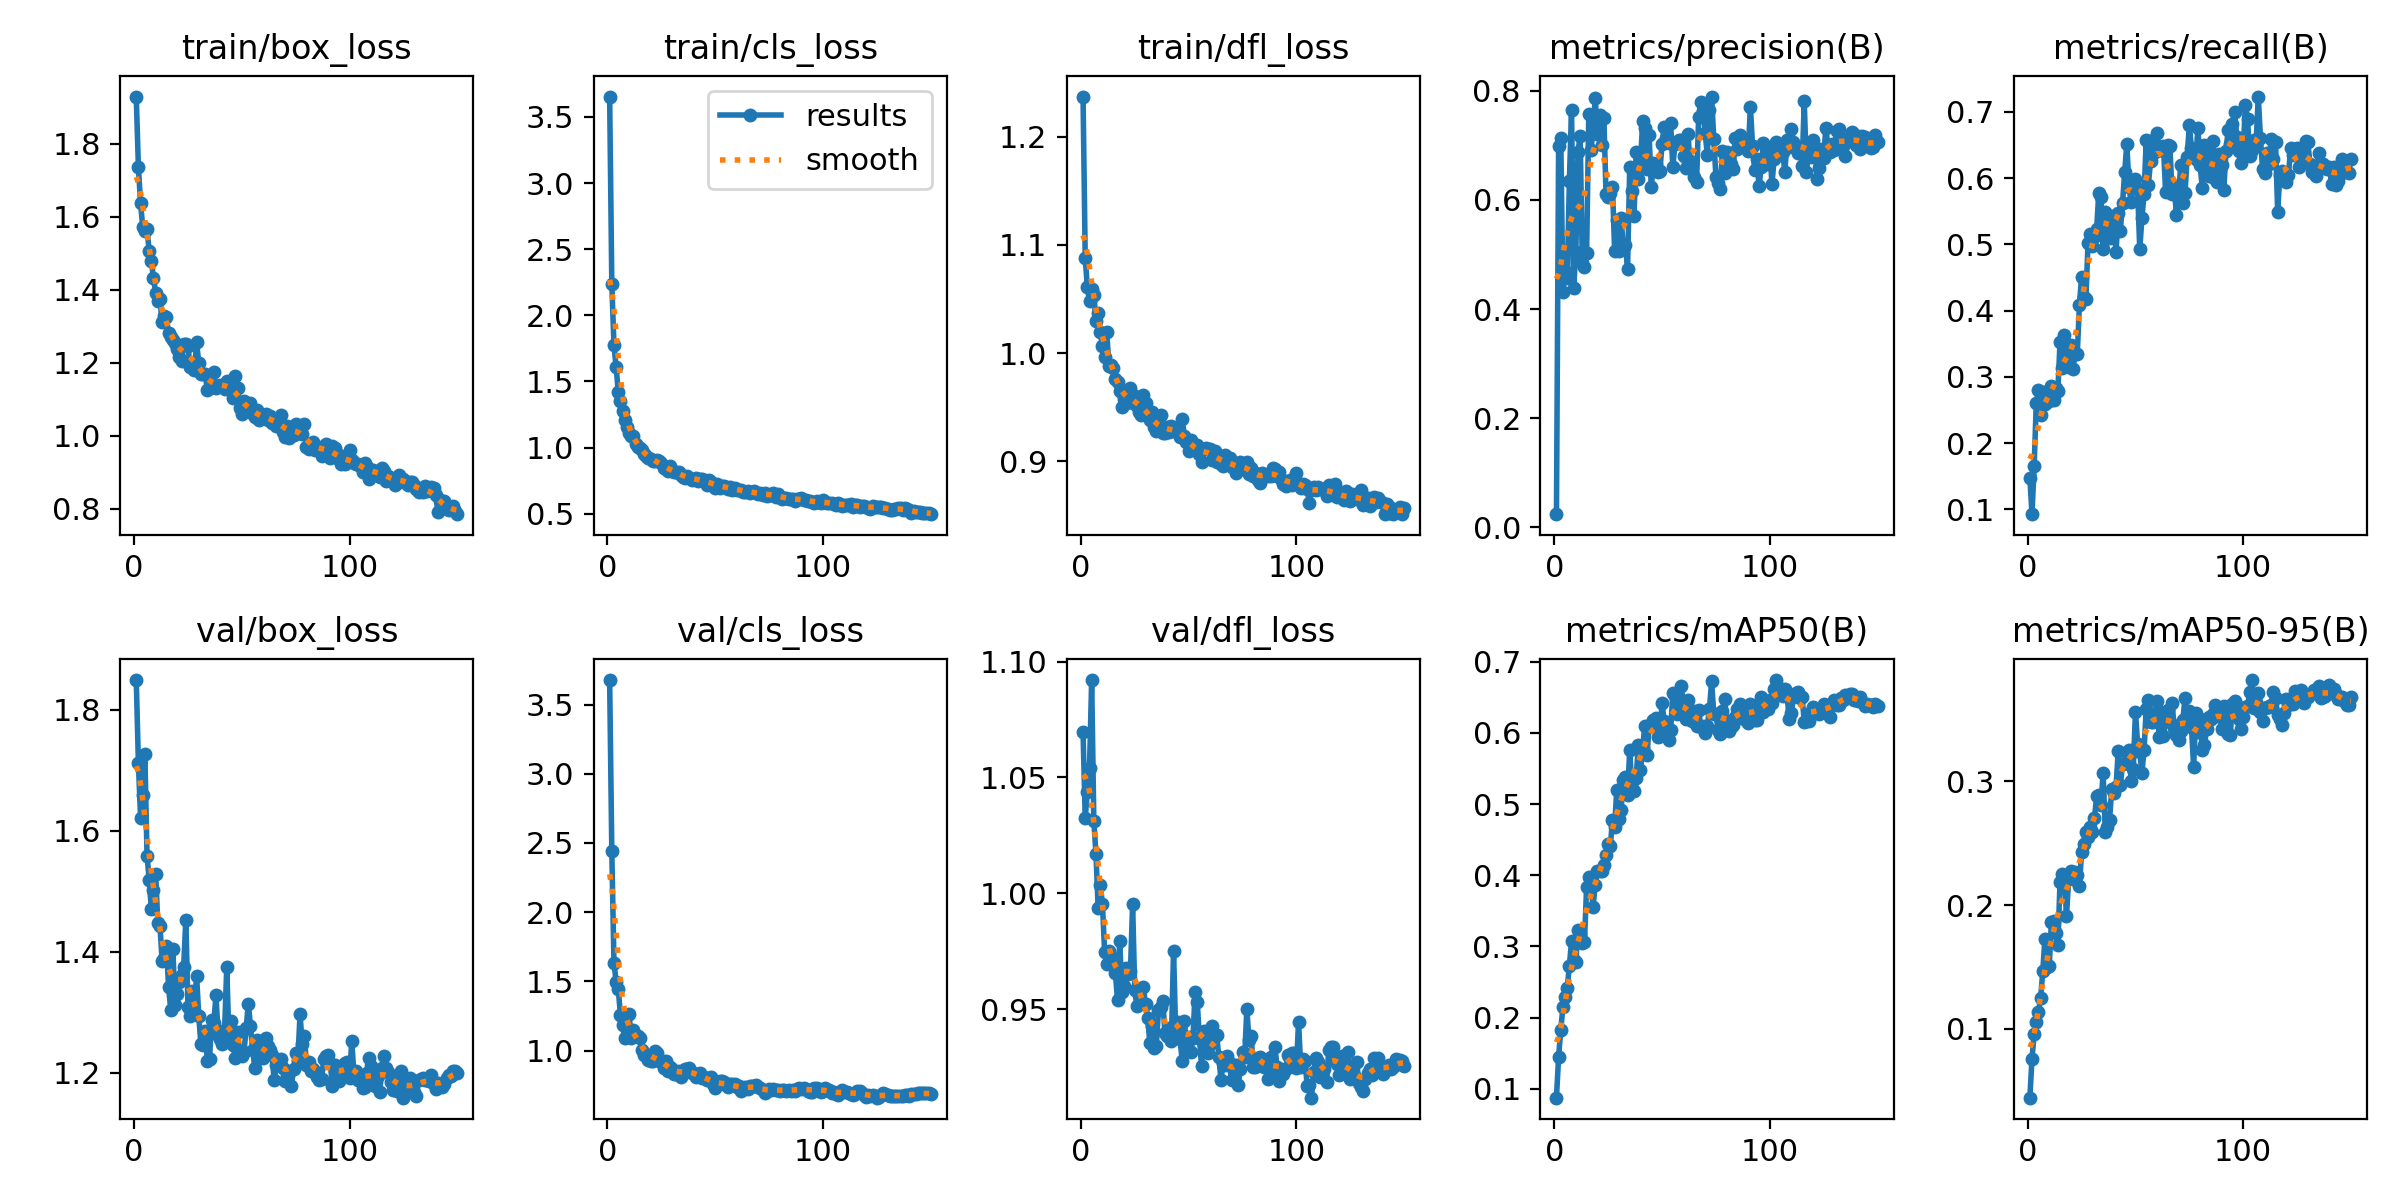

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


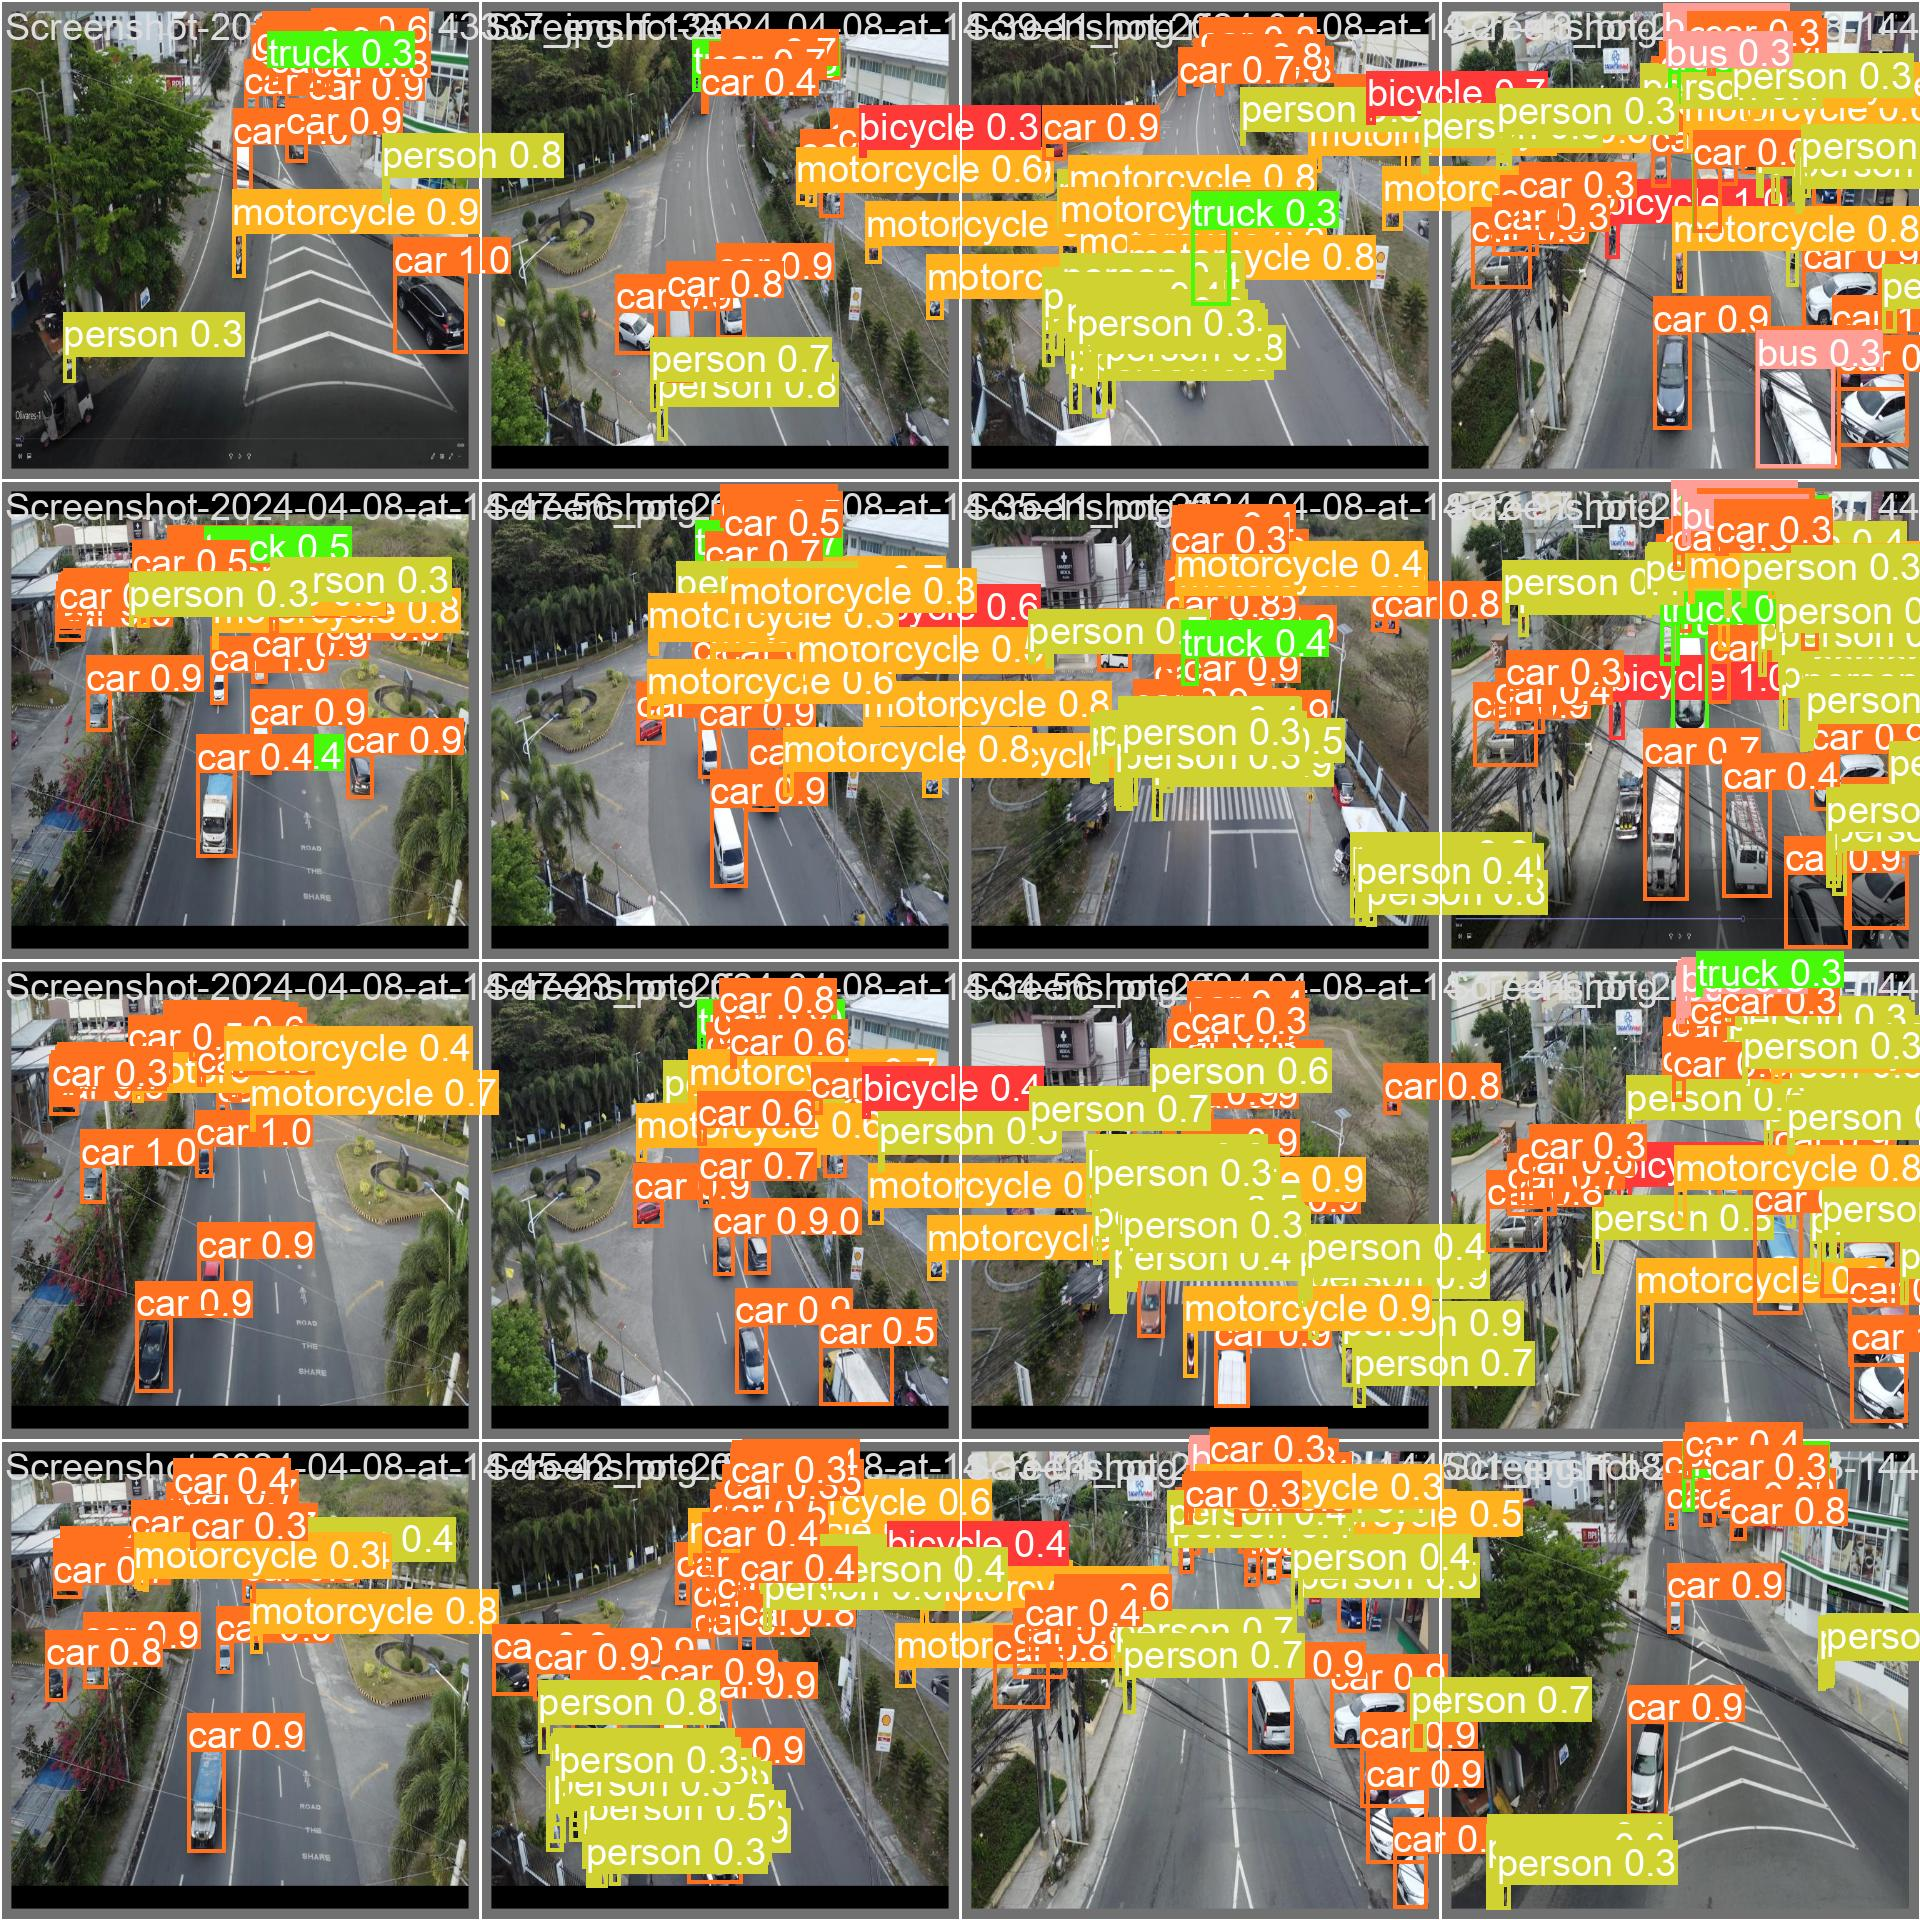

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [18]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/traffic-100-2/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/traffic-100-2/valid/images/Screenshot-2024-04-08-143756_jpg.rf.cefce3815d8fc04e0a2fcb532e321c16.jpg: 1 duplicate labels removed
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.32it/s]
                   all         20        700      0.686      0.641      0.664      0.377
               bicycle         20          9      0.715      0.557      0.625      0.338
             

## Inference with Custom Model

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/10 /content/traffic-100-2/test/images/Screenshot-2024-04-08-143519_jpg.rf.881daeb98233604e2b2a1b8ba7872205.jpg: 640x640 18 cars, 1 motorcycle, 3 persons, 4 trucks, 11.3ms
image 2/10 /content/traffic-100-2/test/images/Screenshot-2024-04-08-143558_jpg.rf.9e7fa0c1f2f733c3cda90af231386216.jpg: 640x640 1 bus, 21 cars, 1 motorcycle, 2 persons, 2 trucks, 8.1ms
image 3/10 /content/traffic-100-2/test/images/Screenshot-2024-04-08-143723_jpg.rf.d0092c10708bf66adc056906aebe2ac7.jpg: 640x640 18 cars, 1 motorcycle, 4 persons, 7.3ms
image 4/10 /content/traffic-100-2/test/images/Screenshot-2024-04-08-144019_jpg.rf.1d9bccb9d4f095fc3c713b80d64c1f9f.jpg: 640x640 18 cars, 9 persons, 1 truck, 8.2ms
image 5/10 /content/traffic-100-2/test/images/Screenshot-2024-04-08-144045_jpg.rf.acf8

**NOTE:** Let's take a look at few results.

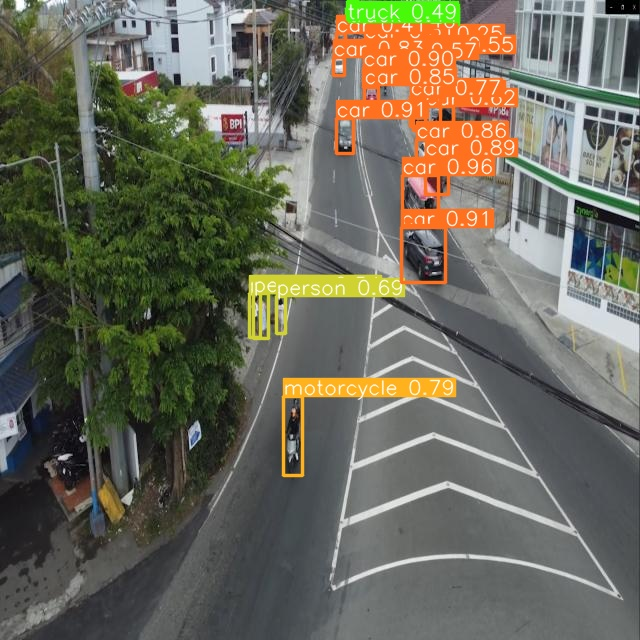

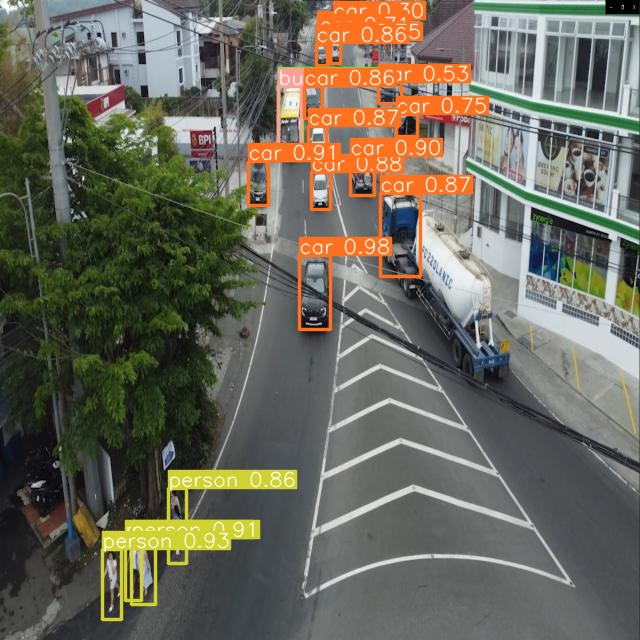

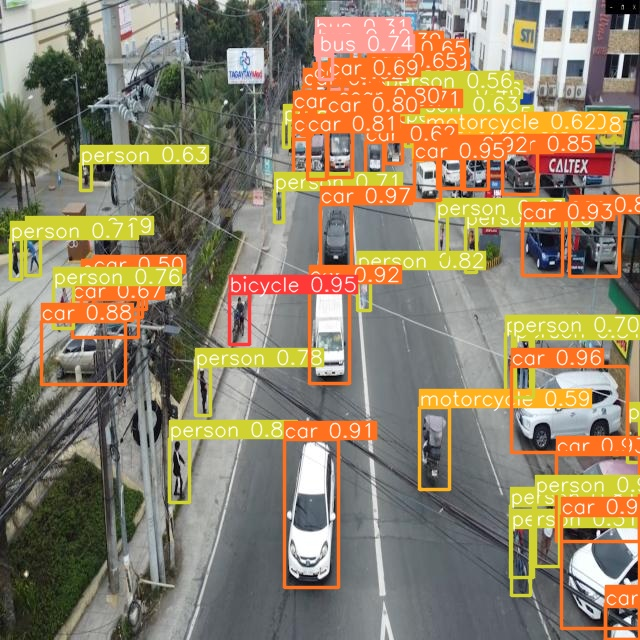

In [21]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [24]:
!zip -r runs.zip runs/

from google.colab import files
files.download("/content/runs.zip")
files.download("/content/yolov8n.pt")


  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/args.yaml (deflated 51%)
  adding: runs/detect/train3/ (stored 0%)
  adding: runs/detect/train3/val_batch1_labels.jpg (deflated 6%)
  adding: runs/detect/train3/labels.jpg (deflated 30%)
  adding: runs/detect/train3/confusion_matrix_normalized.png (deflated 22%)
  adding: runs/detect/train3/results.png (deflated 8%)
  adding: runs/detect/train3/confusion_matrix.png (deflated 27%)
  adding: runs/detect/train3/F1_curve.png (deflated 6%)
  adding: runs/detect/train3/events.out.tfevents.1713238941.30315d0ec885.4998.0 (deflated 79%)
  adding: runs/detect/train3/val_batch0_pred.jpg (deflated 6%)
  adding: runs/detect/train3/P_curve.png (deflated 6%)
  adding: runs/detect/train3/train_batch2.jpg (deflated 1%)
  adding: runs/detect/train3/PR_curve.png (deflated 10%)
  adding: runs/detect/train3/val_batch1_pred.jpg (

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>